Team:

Kayahan Kaya

Magnus Karlson

Ekaterina Sedykh

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
data=pd.read_csv("diabetes.csv")

In [3]:
data.head()

,Glucose Before fasting,Glucose Anytime,Age,Sex,Blood Pressure,Family member with Diabetes past or present,BMI,Pregnancies,percentage of occuring diabetes
0,153.0,225.0,57.0,Female,0.0,0.0,18.0,1.0,69.50
1,156.0,211.0,63.0,Male,0.0,1.0,17.0,0.0,69.25
2,85.0,139.0,60.0,Male,0.0,0.0,18.0,0.0,14.50
3,126.0,149.0,40.0,Male,1.0,0.0,28.0,0.0,62.00
4,117.0,156.0,46.0,Male,1.0,1.0,29.0,0.0,52.25


In [4]:
data.shape

(15251, 9)

In [5]:
data.describe()

,Glucose Before fasting,Glucose Anytime,Age,Blood Pressure,Family member with Diabetes past or present,BMI,Pregnancies,percentage of occuring diabetes
count,15231.000000,15233.000000,15223.000000,15222.000000,15224.000000,15238.000000,15237.000000,15251.000000
mean,129.909855,190.399002,44.095382,0.499869,0.506043,26.953603,0.249262,51.622828
std,29.290305,64.141917,15.268833,0.500016,0.499980,7.745629,0.432600,16.924352
min,80.000000,80.000000,18.000000,0.000000,0.000000,14.000000,0.000000,3.500000
25%,104.000000,134.000000,31.000000,0.000000,0.000000,20.000000,0.000000,40.000000
50%,130.000000,191.000000,44.000000,0.000000,1.000000,27.000000,0.000000,52.250000
75%,155.000000,246.000000,57.000000,1.000000,1.000000,34.000000,0.000000,64.500000
max,180.000000,300.000000,70.000000,1.000000,1.000000,40.000000,1.000000,90.000000


In [6]:
data.columns


Index(['Glucose Before fasting', 'Glucose Anytime', 'Age', 'Sex',
       'Blood Pressure', 'Family member with Diabetes past or present', 'BMI',
       'Pregnancies', 'percentage of occuring diabetes'],
      dtype='object')

In [7]:
data.nunique()

Glucose Before fasting                         101
Glucose Anytime                                221
Age                                             53
Sex                                              2
Blood Pressure                                   2
Family member with Diabetes past or present      2
BMI                                             27
Pregnancies                                      2
percentage of occuring diabetes                347
dtype: int64

# Cleaning Data

In [8]:
data.dropna(inplace=True) 
data.isnull().sum()

Glucose Before fasting                         0
Glucose Anytime                                0
Age                                            0
Sex                                            0
Blood Pressure                                 0
Family member with Diabetes past or present    0
BMI                                            0
Pregnancies                                    0
percentage of occuring diabetes                0
dtype: int64

# Visualisation of Data

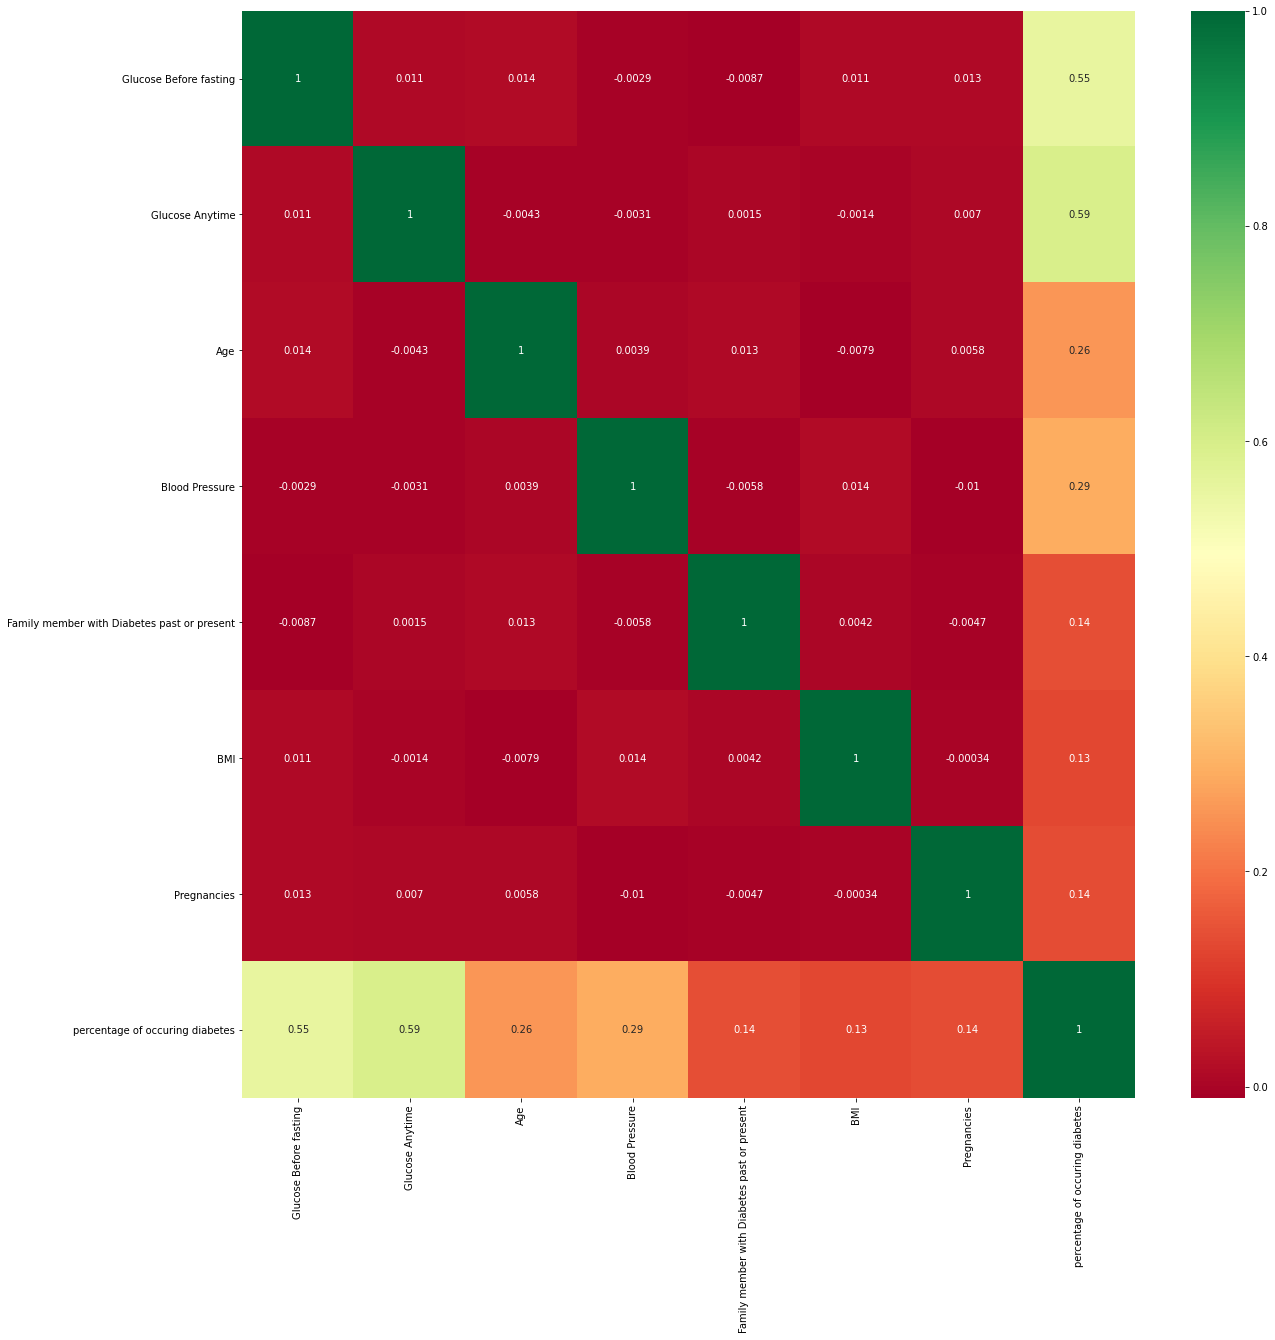

In [9]:


#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

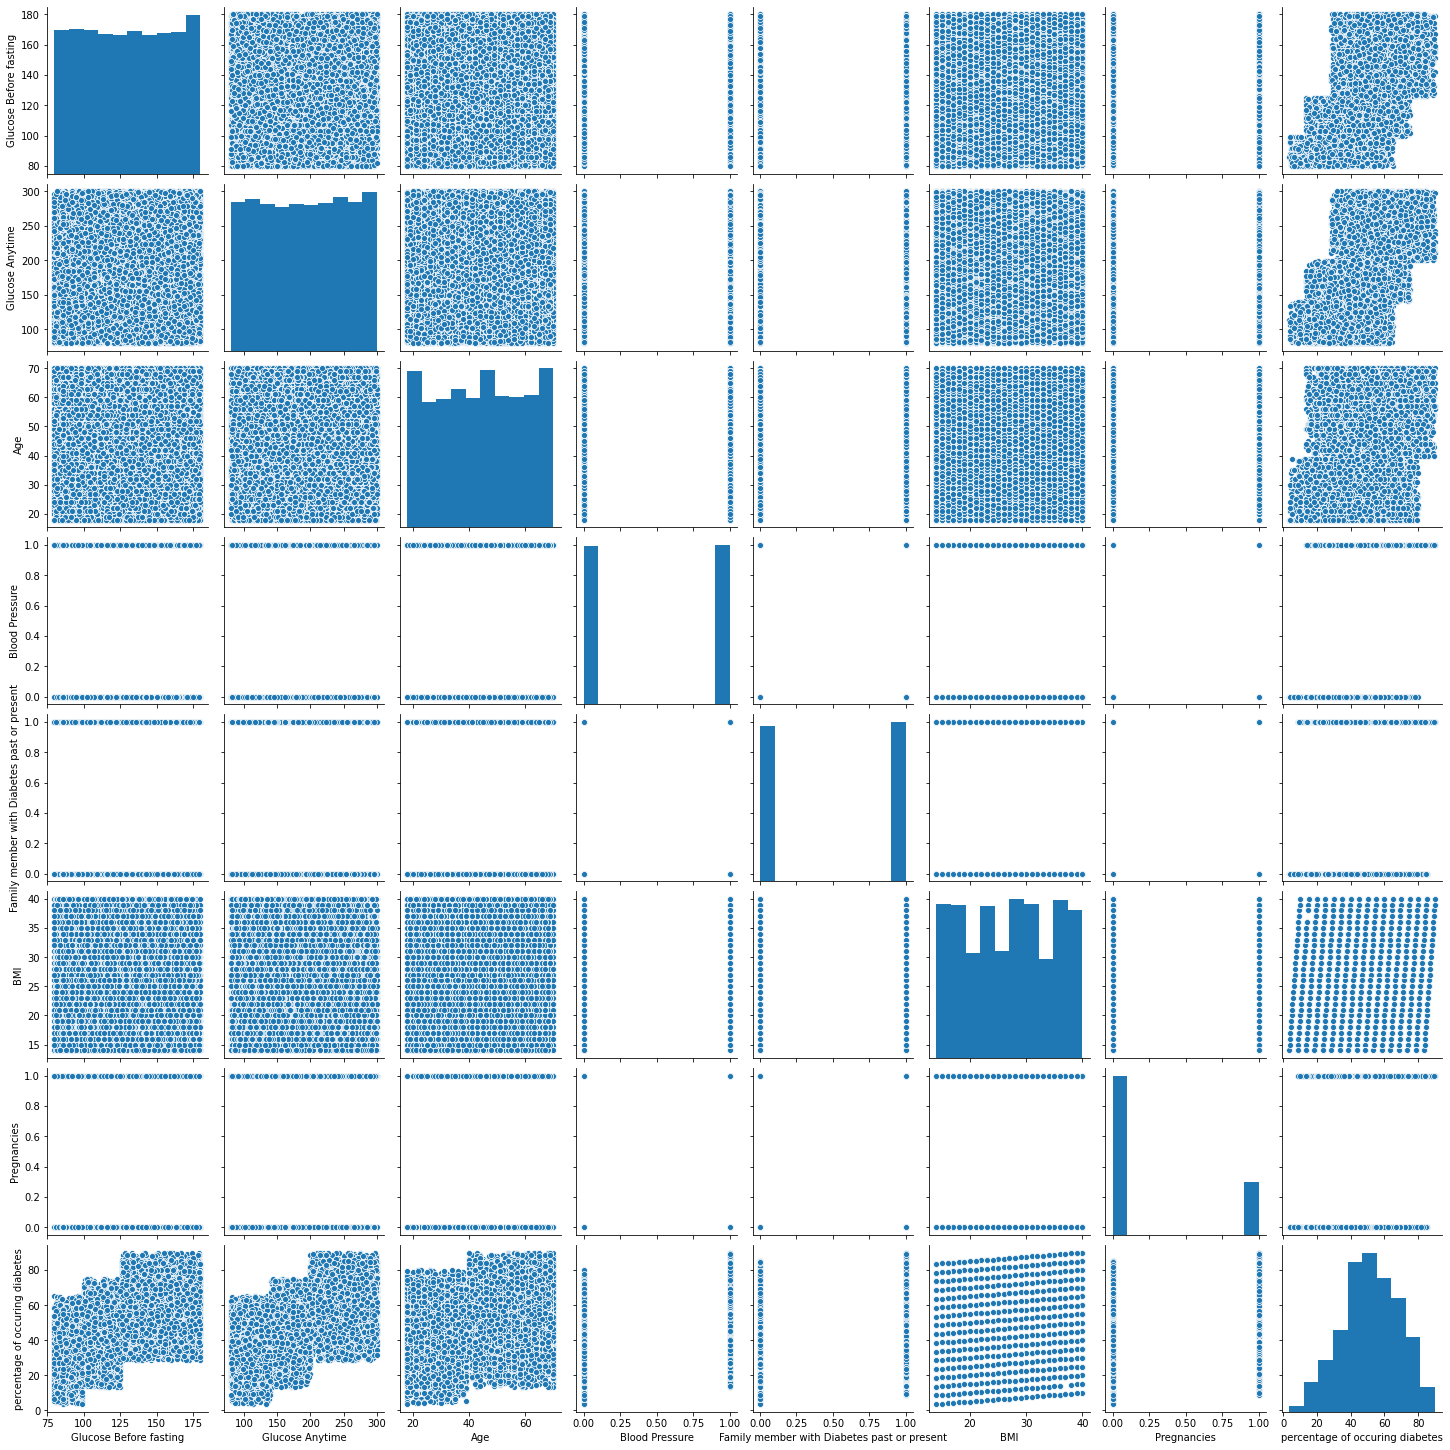

In [10]:
sns.pairplot(data)

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

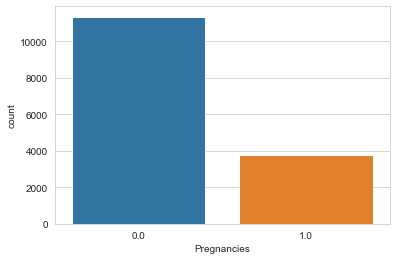

In [11]:
sns.set_style('whitegrid')
sns.countplot(x="Pregnancies",data=data)

<AxesSubplot:xlabel='percentage of occuring diabetes'>

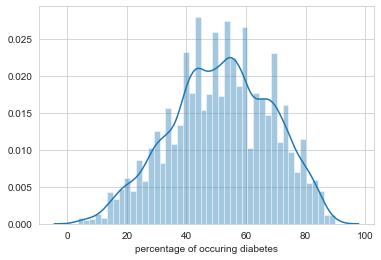

In [12]:
sns.distplot(data['percentage of occuring diabetes'])

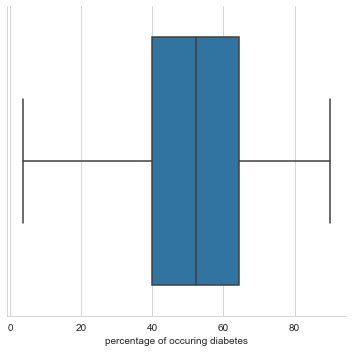

In [13]:
sns.catplot(x='percentage of occuring diabetes',kind='box',data=data)

In [14]:
# Let's convert percentage of diabetes column to binary format.


In [15]:
def func(row):
    if row["percentage of occuring diabetes"]<50:
       row["diabetes"]=0
    else:
       row["diabetes"]=1
    return row
        
    

In [16]:
data=data.apply(func,axis=1)

In [18]:
data.drop("percentage of occuring diabetes",axis=1,inplace=True)

In [19]:
data


,Glucose Before fasting,Glucose Anytime,Age,Sex,Blood Pressure,Family member with Diabetes past or present,BMI,Pregnancies,diabetes
0,153.0,225.0,57.0,Female,0.0,0.0,18.0,1.0,1
1,156.0,211.0,63.0,Male,0.0,1.0,17.0,0.0,1
2,85.0,139.0,60.0,Male,0.0,0.0,18.0,0.0,0
3,126.0,149.0,40.0,Male,1.0,0.0,28.0,0.0,1
4,117.0,156.0,46.0,Male,1.0,1.0,29.0,0.0,1
...,...,...,...,...,...,...,...,...,...
15246,116.0,265.0,54.0,Male,1.0,0.0,29.0,0.0,1
15247,86.0,253.0,62.0,Female,1.0,0.0,40.0,0.0,1
15248,148.0,136.0,28.0,Male,1.0,1.0,22.0,0.0,0
15249,171.0,295.0,64.0,Female,0.0,0.0,28.0,0.0,1


In [20]:
# Let's check our data is whether balanced or not

In [23]:
np.sum(data["diabetes"]==1) #%54.7

8207

In [24]:
np.sum(data["diabetes"]==0)  #%45.3  

6897

In [25]:
# We can say that data is balanced according to rate of distribution at above.

In [26]:

data=pd.get_dummies(data,columns=['Glucose Before fasting','Glucose Anytime','Age','Sex','Blood Pressure','Family member with Diabetes past or present','BMI'])


In [27]:
data

,Pregnancies,diabetes,Glucose Before fasting_80.0,Glucose Before fasting_81.0,Glucose Before fasting_82.0,Glucose Before fasting_83.0,Glucose Before fasting_84.0,Glucose Before fasting_85.0,Glucose Before fasting_86.0,Glucose Before fasting_87.0,...,BMI_31.0,BMI_32.0,BMI_33.0,BMI_34.0,BMI_35.0,BMI_36.0,BMI_37.0,BMI_38.0,BMI_39.0,BMI_40.0
0,1.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15246,0.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15247,0.0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
15248,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15249,0.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
y=data['diabetes'].values
data=data.drop("diabetes",axis=1)


In [29]:
import numpy as np
from sklearn.model_selection import train_test_split
X=data

Xtrain, Ytest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50,max_depth=75,random_state=30).fit(Xtrain, ytrain)
accuracy_rf=rf.score(Ytest,ytest)
accuracy_rf


0.8152929493545183

In [31]:
Accuracy={"RF":accuracy_rf}
accuracy_df=pd.DataFrame(Accuracy,index=[0])

In [32]:
from sklearn.tree import DecisionTreeClassifier


dt = DecisionTreeClassifier()
dt.fit(Xtrain, ytrain)
accuracy_dt=dt.score(Ytest,ytest)
accuracy_dt

0.7765640516385303

In [33]:
accuracy_df["DT"]=accuracy_dt

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()
knn.fit(Xtrain, ytrain)
accuracy_knn=knn.score(Ytest,ytest)
accuracy_knn

0.6924859318106588

In [35]:
accuracy_df["KNN"]=accuracy_knn

In [36]:
accuracy_df

,RF,DT,KNN
0,0.815293,0.776564,0.692486


In [37]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression().fit(Xtrain, ytrain)
accuracy_reg = reg.score(Ytest,ytest)
accuracy_reg

0.979808010592519

In [38]:
accuracy_df["LOG_REG"]=accuracy_reg

In [39]:
accuracy_df

,RF,DT,KNN,LOG_REG
0,0.815293,0.776564,0.692486,0.979808


In [40]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(Xtrain, ytrain)
accuracy_gnb = gnb.score(Ytest,ytest)
accuracy_gnb

0.812975835815955

In [41]:
accuracy_df["GAUS"]=accuracy_gnb

In [ ]:
from sklearn import svm
svm = svm.SVR()
svm.fit(Xtrain, ytrain)
accuracy_svm = svm.score(Ytest,ytest)
accuracy_svm


In [ ]:
accuracy_df